In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings

from IPython.display import HTML
from helper import visualization
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 5)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Training Deep Networks

<center><img src="https://img.devrant.com/devrant/rant/r_1377416_RCMq1.jpg" width=800>

# Overview

* Gradient Descent
* Loss Functions
* Optimizers
* Regularization
* Augmentation
* Transfer Learning

# Universal Approximation Theorem

A feedforward network with a single hidden layer containing a finite number of neurons can approximate any *continuous* function on a bounded interval to arbitrary percision [Cybenko 1989]

* Given some function $f(x)$, we'd like to compute within some desired accuracy $\epsilon > 0$


* The guarantee is that by using enough hidden neurons we can always find a neural network whose output $g(x)$ satisfies $|g(x)−f(x)|<\epsilon$, for all inputs $x$

* I'd recommend reading [this](http://neuralnetworksanddeeplearning.com/chap4.html#universality_with_one_input_and_one_output) might be on the *midterm*

# Approximating with Step Functions
<center><img src="https://miro.medium.com/max/1400/1*YryNBGz5VYBOQ-2oZqesUA@2x.png">

Visually what the universal approximation theorem tells us is that as as we increase the number of neurons the prediction (orange line) gets closer to the true values (blue line).


# Gradient Descent

In [4]:
HTML('<iframe width="100%" height="500" src="https://www.youtube.com/embed/5u0jaA3qAGk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Option 1: Random Search


* Randomly chose weights and check if they improve the cost


* Terribly ineffecient

* Backpropagation is more efficient than random search by a factor of the number of connections


# Option 2: Numerical Gradient

* **Intuition:** gradient describes rate of change of a function with respect to a variable surrounding an infinitesimally small region 
* **Finite differences**


\begin{equation}
    \frac{f(x+h) - f(x)}{h}
\end{equation}

* How do we compute the gradient independent of each input?


# Option 3: Analytical Gradient

* Chain rule

\begin{equation}
    z = f(y); y = g(x)
\end{equation}


\begin{equation}
    \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}
\end{equation}


* We know the structure of the computational graph beforehand


# Why do we need to know this?

* Deep learning frameworks can automatically perform backprop
* Problems might surface related to underlying gradients when debugging your models

* [Yes you should understand gradient descent](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)


# Problem Statement
* We have a loss that is a function of the input, output, and our parameters
* We want to minimize this loss for all training examples

\begin{equation}
    loss = f(x, y; \theta)
\end{equation}

# Loss Functions
**Regression:**

* Mean Squared Error (MSE)
    * Penalizes outliers
* Mean Absolute Error (MAE)
    * Good when values are small

**Classification:**

* Binary Cross-Entropy 
    * Binary classification
* Categorical Cross-Entropy
    * Multiple categories (e.g. image classification)

# Mean Squared Error


\begin{equation}
    J = \frac{1}{2N} (y - \hat{y})^2
\end{equation}

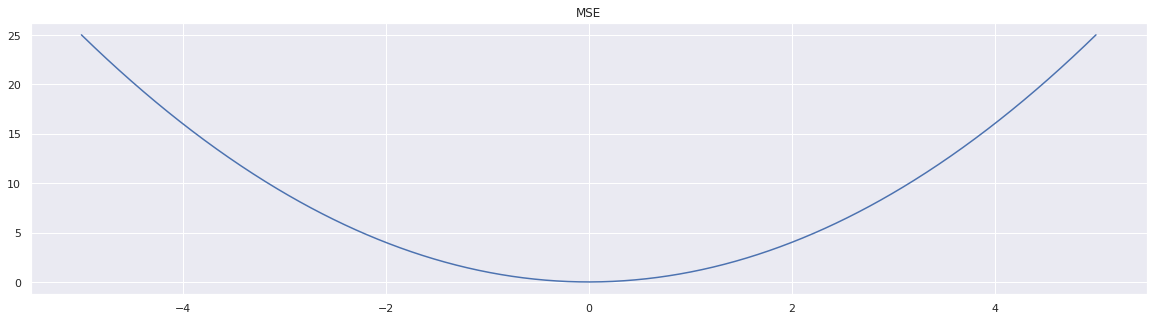

In [5]:
x = np.linspace(-5, 5, 1000); y = x**2
plt.plot(x,y); plt.title('MSE'); plt.show()

# Mean Absolute Error


\begin{equation}
    J = \frac{1}{2N} |y - \hat{y}|
\end{equation}

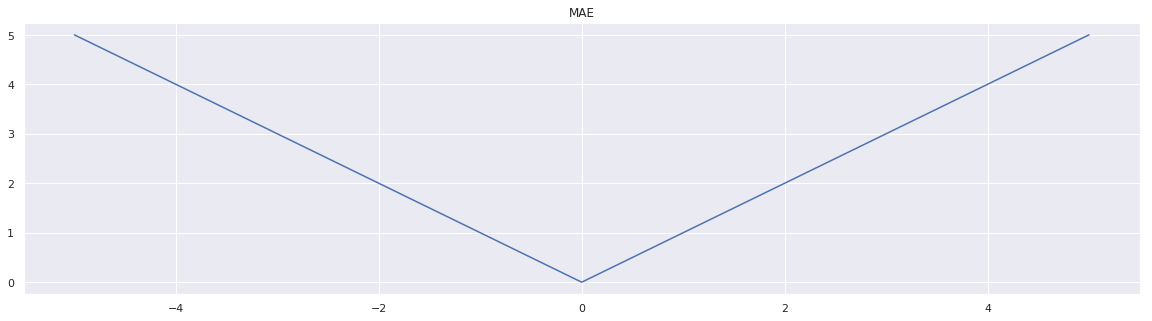

In [6]:
x = np.linspace(-5, 5, 1000); y = np.abs(x)
plt.plot(x,y); plt.title('MAE'); plt.show()

# MSE vs MAE

<img width="100%" src="https://miro.medium.com/max/875/1*JTC4ReFwSeAt3kvTLq1YoA.png">

* MAE has the same gradient everywhere
* MAE is more robust to outliars

# Logistic Regression (Sigmoid)

* Should be familiar from logistic regression


\begin{equation}
    \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

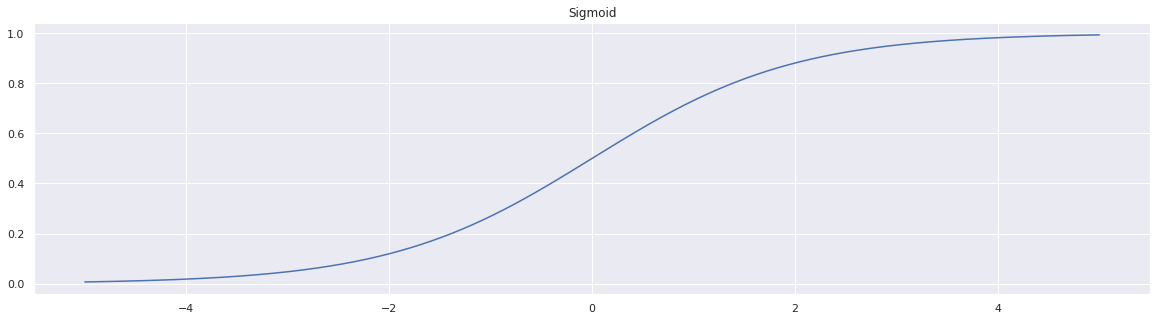

In [7]:
x = np.linspace(-5, 5, 1000); y = 1 / (1 + np.exp(-x))

plt.plot(x,y); plt.title('Sigmoid'); plt.show()

# Binary Crossentropy (Negative Log Likelihood)

\begin{equation}
P(y|x, \theta) = \sigma(x)^y (1 - \sigma(x))^{1-y} 
\end{equation}

\begin{equation}
    J = - y \log(\hat{y}) - (1-y) \log(1 - \hat{y})
\end{equation}

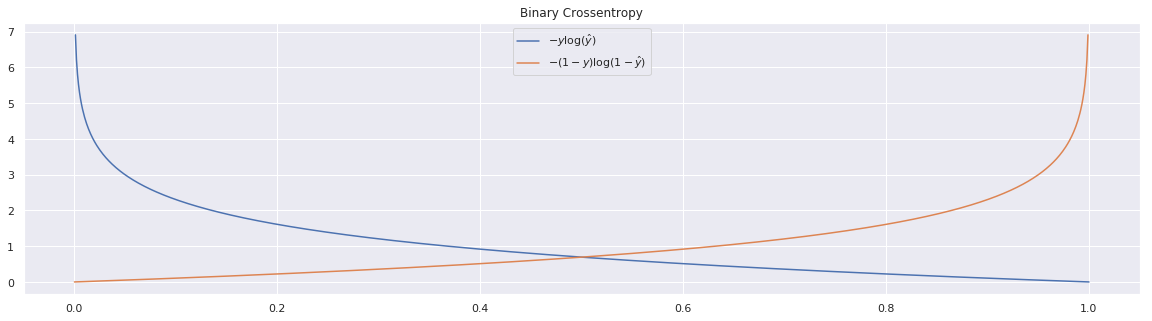

In [8]:
x = np.linspace(0, 1, 1000)
plt.plot(x,-np.log(x), label='$-y\log(\hat{y})$'); plt.plot(x,-np.log(1-x), label='$-(1-y)\log(1-\hat{y})$')
plt.title('Binary Crossentropy'); plt.legend(); plt.show()

# Softmax  

\begin{equation}
    \hat{y_i} = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}} 
\end{equation}

* Output sums to one
* Represent probability distribution across discrete mutually exclusive alternatives

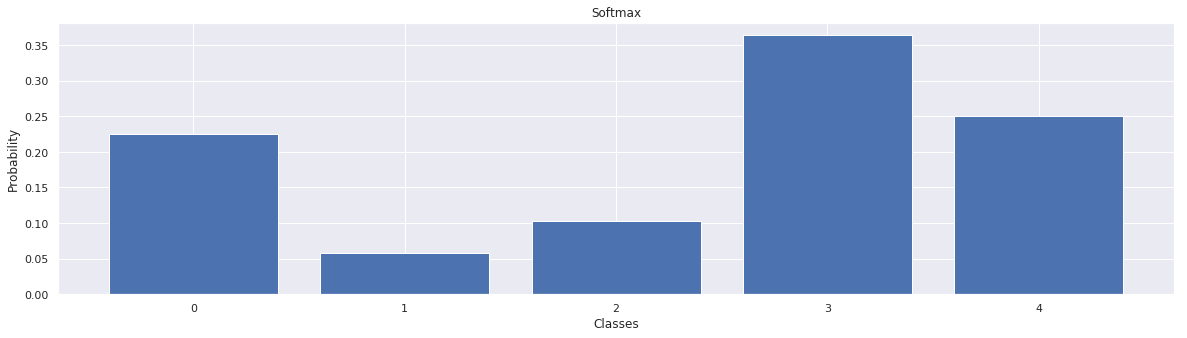

In [9]:
def softmax(x): return np.exp(x)/np.sum(np.exp(x))
x = np.random.randn(5); y = softmax(x)
plt.bar(np.arange(5), y); plt.xlabel('Classes'); plt.ylabel('Probability'); plt.title('Softmax'); plt.show()

# Softmax Derivative

\begin{equation}
    \frac{\partial \hat{y_i}}{\partial z_i} = \hat{y_i} ( 1 - \hat{y_i})
\end{equation}

# Cross-entropy Cost Function
* Generic case for many classes
* Convince yourself this is the same thing as binary crossentropy (i.e. two classes)

\begin{equation}
    J = - \sum_j y_j \log \hat{y_j}
\end{equation}

\begin{equation}
    \frac{\partial J}{\partial z_i} = - \sum_j \frac{\partial J}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial z_i} = \hat{y_i} - y_i
\end{equation}

In [10]:
def d_softmax(y_hat, y):
    return y_hat - y

It's often useful to rewrite mathematical expressions like this into computation graphs. This is how libraries like tensorflow handle these computations. Everytime an expression (e.g $(x+y)$) is added to the equation, a node is added to the computation graph. This way the library can easily identify the order of operations and the pathway to pass derivatives back during gradient descent.

# Chain Rule Computation Graphs

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzp_2ofryV5OI_UYxcAB55Dkmw4ulnGD_LJM2AidvUtn7cR7Rm" width=300>

<center>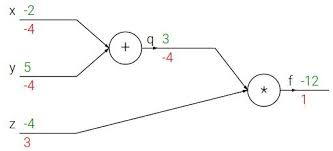


# Backprop Example 

<center><img src="https://mohitd.github.io/images/backpropagation/forward-pass.png">

# Solution

<center><img src="https://mohitd.github.io/images/backpropagation/backward-pass.png">

# Backpropagation

* Detailed example can be found [here](https://mohitd.github.io/2017/11/22/backpropagation.html)
* Slides from stanford discussion on [Backpropagation and Gradients](http://cs231n.stanford.edu/slides/2018/cs231n_2018_ds02.pdf)

# Mini-batch SGD Loop:
1. Sample a batch of data
2. Forward prop it through the graph (network), get loss
3. Backprop to calculate the gradients
4. Update the parameters using the gradient

# SGD
* Because we use minibatches gradients can be noisy

\begin{equation}
    \theta_{t+1} = \theta_t - \alpha \nabla J(\theta)
\end{equation}

\begin{equation}
    J(\theta) = \frac{1}{N} \sum_{i=1}^{N} J_i (x_i, y_i, \theta)
\end{equation}

\begin{equation}
    \nabla_{\theta} J(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla_{\theta}  J_i (x_i, y_i, \theta)
\end{equation}

* Mini batch SGD is unbiased estimator but has high variance

# Types of Gradient Descent

<center><img src="https://miro.medium.com/max/1400/1*PV-fcUsNlD9EgTIc61h-Ig.png">

**Batch gradient descent** involves computing gradients over the entire training set then performing a weight update once, at the end. This is computationally expensive and inefficient because it takes so long for one update to occur. 

**Stochastic Gradient descent** computes the gradient and performs a weight update for each training example. 

**Mini-batch gradient descent** computes gradients and weight updates for small batches of the data. 

**Naming convention:** normally when people refer to SGD

# Learning Rate

<center><img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/learning_rates.png?raw=true">

# Optimizers
* We've seen Stochastic Gradient Descent (SGD)
* We can add tricks to improve learning
    * Stability
    * Efficiency
    * Generalization

* Controls weight updates and gradient monitoring during training

# Momentum
* Use direction of gradients to push us forward
* Helps to avoid local minima

Momentum usually is $\rho = 0.9$ 

\begin{equation}
    v_{t+1} = \rho v_t + \nabla J(\theta)
\end{equation}

\begin{equation}
    \theta_{t+1} = \theta_t - \alpha v_{t+1}
\end{equation}

In [11]:
v = 0
def momentum(theta):
    while True:
        dtheta = compute_gradients(theta)
        v = rho * v + dtheta
        theta -= learning_rate * v

# AdaGrad
* Element wise scaling of gradient based on past sum of squares in each dimension
* Adaptive learning rate

In [12]:
def AdaGrad(theta, grad_squared=0, learning_rate=0.001):
    dtheta = compute_gradients(theta)
    grad_squared += dtheta * dtheta
    
    theta -= learning_rate * dtheta / (np.sqrt(grad_squared) + 1e-7)
    return grad_squared

* What happens to step size over time?

* Decays to 0

* What happens with AdaGrad?

* Progress along “steep” directions is damped, progress along “flat” directions is accelerated

# RMSProp

In [13]:
grad_squared = 0
def RMSProp(theta):
    while True:
        dtheta = compute_gradients(theta)
        grad_squared += decay_rate * grad_squared + (1 - decay_rate) * dtheta * dtheta

        theta -= learning_rate * dtheta / (np.sqrt(grad_squared) + 1+e-7)

* Second moment controls variance of gradients

# Adam

In [14]:
first_moment = 0; second_moment = 0 
def Adam(theta, num_iterations=1):
    for t in range(1, num_iterations):
        dtheta = compute_gradients(theta)
        # momentum
        first_moment = beta1 * first_moment + (1 - beta1) * dtheta
        # AdaGrad / RMSProp
        second_moment = beta2 * second_moment + (1 - beta2) * dtheta * dtheta
        # bias correction
        first_unbias = first_moment / (1 - beta1 ** t)
        second_unbias = second_moment / (1 - beta2 ** t)
        # AdaGrad / RMSProp
        theta -= learning_rate * first_unbias / (np.sqrt(second_unbias) + 1e-7)

* Sort of like RMSProp with momentum
* First moment ~ momentum
* Second moment ~ lowers variance of gradient estimates

* Bias correction for the fact that first and second moment estimates start at zero
* Very good for fast training
* Can hurt generalization

* Adam with beta1 = 0.9, beta2 = 0.999, and learning_rate = 1e-3 or 5e-4 is a great starting point for many models

# Optimizers
![](https://cdn-images-1.medium.com/max/1600/0*o9jCrrX4umP7cTBA)

<img width=80% src="https://image.slidesharecdn.com/dlai2017d4l1optimization-171101161756/95/optimization-dlai-d4l1-2017-upc-deep-learning-for-artificial-intelligence-30-638.jpg?cb=1509553427">

# Recommendations in Practice

* Adam is a good default choice in many cases
* SGD+Momentum with learning rate decay often outperforms Adam by a bit, but requires more tuning

# Regularization
* $L_1, L_2$ weight penalties
* Dropout
* Batch Normalization
* Data Augmentation

# Dropout
* Randomly drop (set activities to 0) neurons in layer with probability $p$
* Reduces dependence on single neurons
* Increases generalization
* Ensemble of networks

<img src=https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/dropout.png width=100%>

**Implementation detail:**
* Turn dropout off at test time
* Multiply layer activities by $p$

# Dropout Test Time
* Multiply layer activies by $p$

* During training $(p=\frac{1}{2})$:

\begin{equation}
    \textbf{E}[y] = \frac{1}{4}(w_1 x_1 + w_2 x_2) + \frac{1}{4}(w_1 x_1 + 0 x_2) + \frac{1}{4}(0 x_1 + w_2 x_2) + \frac{1}{4}(0 x_1 + 0 x_2)
\end{equation}

* During testing:

\begin{equation}
    \textbf{E}[y] = w_1 x_1 + w_2 x_2
\end{equation}

\begin{equation}
    \textbf{E}[y] = \frac{1}{2}(w_1 x_1 + w_2 x_2)
\end{equation}

# Dropout p = 0.5

<img width=100% src="https://thumbs.gfycat.com/MilkyBriskAnura-size_restricted.gif">

# Batch Norm

* “you want zero-mean unit-variance activations? just make them so.”
* Compute mean and variance of each dimension
* Normalize

\begin{equation}
\hat{x}^{(l)} = \frac{x^{(l)} - E[x^{(l)}]}{\sqrt{Var[x^{(l)}]}}
\end{equation}

[Ioffe and Szegedy, 2015]

* Sort of a regularization technique
* Better gradient flow through network

# Model Ensembles
* Train multiple independent models

* At test time average their results


* Usually gives 1-2% improvement


# Data Augmentation

* Rotation
* Random cropping
* Adding gaussian noise
* Translating images (vertically and horizontally)

# Transfer Learning
* Take a pretrained network (trained to classify cats)
* Use it for a new task (classify dogs)

* These are similar taskes (cats and dogs share similar features)
* Need much less data to train

# Transfer Learning 
![](https://indico.io/wp-content/uploads/2016/02/transfer_learning_nathan.jpg)

# When to use transfer learning

| _ | Similar dataset | Different dataset |  
| ----- |:-----:| -----:|  
| Small data | Train new top layer | Bummer |  
| Big Data | Finetune a couple layers | Finetune most layers |  

# Skip Connections

<img src="https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png">

* Allow us to build very deep networks (hundreds of layers)
* Why are these effective?

Skip connects also called residual connections. Instead of only passing the output $F(x)$ to the next layer the input, $x$, is also combined with the input. 

<img src="https://miro.medium.com/max/2000/1*6hF97Upuqg_LdsqWY6n_wg.png">



# Effect of Skip Connections on the Loss

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/dd1fad77d7c17883756b9866a31e53f52c96fe51/1-Figure1-1.png">

[Li et al. 2018](https://arxiv.org/pdf/1712.09913.pdf)

# Tips

* Watch the loss
* Check for over fitting
* Use dropout, batchnorm, skip connections